# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?


### Solution


In this study, I investigate the application of the Metropolis algorithm to sample the probability densities associated with two hydrogen atom wavefunctions in three-dimensional Cartesian space: the ground state $\Psi_{1,0,0}$ and the first excited state $\Psi_{2,1,0}$. Specifically, I aim to generate random points distributed according to the squared modulus of the wavefunctions, $\left|\Psi_{nlm}(x,y,z)\right|^2$, and to use these samples to compute physical observables, such as the expected value of the radial distance $\langle r \rangle$.
I perform the sampling directly in Cartesian coordinates, without transforming to spherical coordinates. 

The Metropolis algorithm requires a proposal mechanism to generate new points in space. I experiment with two types of transition probabilities:
- a **uniform distribution**, where proposed steps are uniformly distributed within a cube centered on the current position, and
- a **Gaussian distribution**, where proposed steps follow a normal distribution in each Cartesian coordinate.

In both cases, the proposal must be tuned to ensure a reasonable acceptance rate. It is well known that an optimal acceptance rate for Metropolis sampling in low-dimensional problems is around **50%**. To achieve this, I empirically adjusted the step size parameters (the width of the uniform distribution or the standard deviation of the Gaussian) until the acceptance ratio approached this optimal value. The tuned values are:
- For $\Psi_{1,0,0}$: $\delta = 1.2$ (uniform), $\sigma = 0.7$ (Gaussian)
- For $\Psi_{2,1,0}$: $\delta = 2.8$ (uniform), $\sigma = 1.8$ (Gaussian).


These parameters were chosen based on short preliminary simulations and confirmed by monitoring the acceptance rates reported in the output logs. 



All distances are expressed in Bohr radius $a_0$ unit.




##### Equilibration 



Before collecting statistics, I need to ensure that the Markov chain has reached equilibrium. This means that the distribution of sampled points has sufficiently converged to the target probability density, and the system is no longer influenced by the choice of the initial condition. In general, depending on how far the initial configuration is from the regions of significant probability density, the system may require a substantial number of steps before reaching equilibrium.

To monitor equilibration, I use the cumulative average of the radial distance $r = \sqrt{x^2 + y^2 + z^2}$. I find this more informative than looking at the raw $r$ values directly, which tend to fluctuate significantly and do not clearly show convergence. The cumulative average smooths these fluctuations and provides a more reliable indication of whether the sampling has stabilized.

For reasonably chosen starting points:
- For the ground state $\Psi_{1,0,0}$, I start at the origin $(0,0,0)$, where the wavefunction is maximal.
- For the excited state $\Psi_{2,1,0}$, which is zero at the origin, I start at $(0,0,2)$, where the probability density is higher and non zero.

In these cases, the cumulative average of $r$ typically stabilizes after about **2000 steps**, as shown in the first graph below, which I take as the equilibration phase to be discarded. All the previous results are valid for both transition probabilities.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams.update({'font.size': 22})

In [39]:
data_close_100 = pd.read_csv('es_05.1/EQ/OUTPUT/r_eq_close100.dat', names=['move', 'unif', 'gauss'], delimiter=' ')
data_far_100 = pd.read_csv('es_05.1/EQ/OUTPUT/r_eq_far100.dat', names=['move', 'unif', 'gauss'], delimiter=' ')

data_close_210 = pd.read_csv('es_05.1/EQ/OUTPUT/r_eq_close210.dat', names=['move', 'unif', 'gauss'], delimiter=' ')
data_far_210 = pd.read_csv('es_05.1/EQ/OUTPUT/r_eq_far210.dat', names=['move', 'unif', 'gauss'], delimiter=' ')

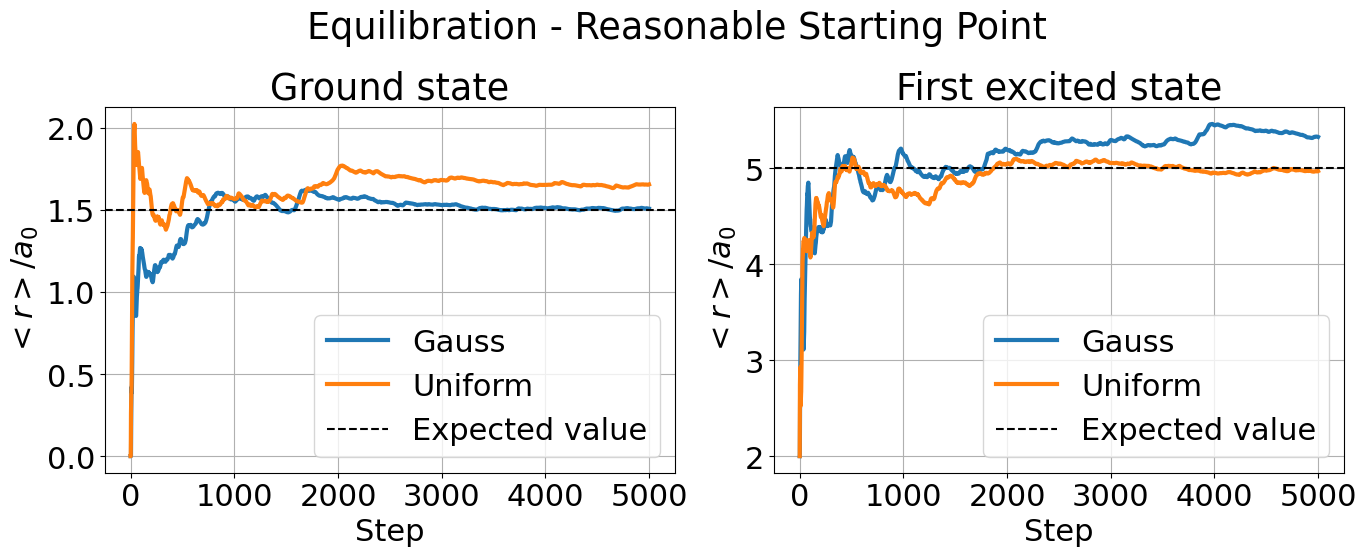

In [40]:
running_avg_gauss = np.cumsum(data_close_100.gauss) / np.arange(1, len(data_close_100.gauss)+1)
running_avg_unif = np.cumsum(data_close_100.unif) / np.arange(1, len(data_close_100.unif)+1)

fig, ax = plt.subplots(1,2, figsize=(14,6))
fig.suptitle("Equilibration - Reasonable Starting Point")
ax[0].plot(running_avg_gauss, label='Gauss', lw=3)
ax[0].plot(running_avg_unif, label='Uniform', lw=3)
ax[0].axhline(y=1.5, color='black', linestyle='--', label='Expected value', lw=1.5) 
ax[0].set_xlabel("Step")
ax[0].set_ylabel(r"$<r>/a_0$")
ax[0].legend()
ax[0].set_title("Ground state")
ax[0].grid()

running_avg_gauss = np.cumsum(data_close_210.gauss) / np.arange(1, len(data_close_210.gauss)+1)
running_avg_unif = np.cumsum(data_close_210.unif) / np.arange(1, len(data_close_210.unif)+1)


# ax[1].plot(data_close_210.gauss.values, 'o', label='Gauss', alpha=0.2)
# ax[1].plot(data_close_210.unif.values, 'o',label='Uniform', alpha=0.2)
ax[1].plot(running_avg_gauss, label='Gauss', lw=3)
ax[1].plot(running_avg_unif, label='Uniform', lw=3)
ax[1].axhline(y=5, color='black', linestyle='--', label='Expected value', lw=1.5)
ax[1].set_xlabel("Step")
ax[1].set_ylabel(r"$<r>/a_0$")
ax[1].legend()
ax[1].set_title("First excited state")
ax[1].grid()

plt.tight_layout(rect=[0, 0.03, 1, 1.05])
plt.show()


However, I also explore what happens when the simulation begins from a highly unlikely configuration, such as $(200,200,200)$. This allows me to better understand how the sampler explores the space when starting far from any physically relevant region. In these cases:
- It takes approximately **1500 steps** for the sampler in the $\Psi_{1,0,0}$ case to reach a region of non-negligible probability.
- For $\Psi_{2,1,0}$, it takes slightly less—around **750 steps**.

Yet, even after reaching the correct region of space, I observe that an additional **1000 steps** are necessary before the cumulative average of $r$ begins to stabilize and approach reasonable values. This indicates that simply entering the support of the distribution is not sufficient; the Markov chain still needs time to forget the initial condition and redistribute itself properly. All the previous results are valid for both transition probabilities.

Interestingly, when starting from these far-off configurations, the equilibration process is clearly visible by looking at how the instantaneous values of $r$ shift rapidly over the first few thousand steps. This initial transient is followed by a slower convergence visible in the cumulative average, which again proves to be a crucial diagnostic tool for determining when equilibrium is reached.


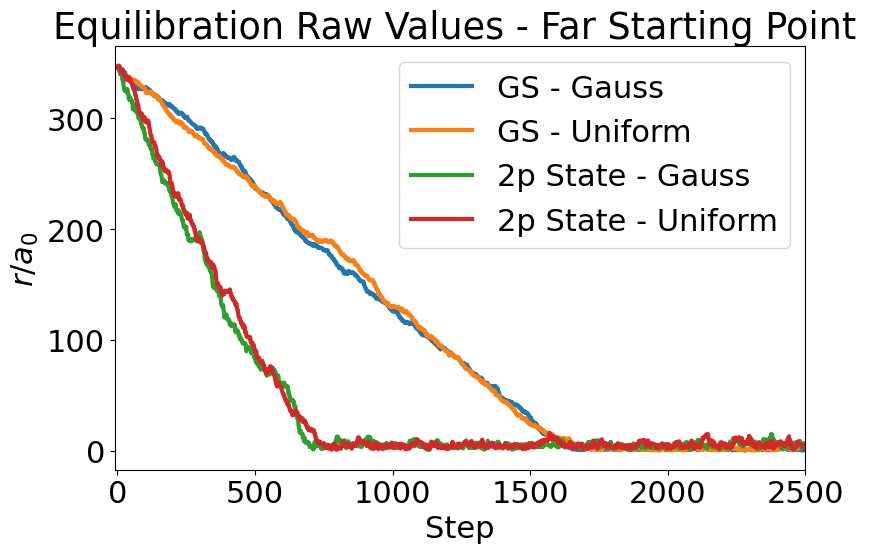

In [41]:
plt.figure(figsize=(9, 6))

data_far_100.gauss.plot(label='GS - Gauss', lw=3)
data_far_100.unif.plot(label='GS - Uniform', lw=3)
data_far_210.gauss.plot(label='2p State - Gauss',  lw=3)
data_far_210.unif.plot(label='2p State - Uniform',  lw=3)
plt.xlabel('Step')
plt.ylabel(r'$r/a_0$')
plt.xlim(-10, 2500)
plt.title('Equilibration Raw Values - Far Starting Point ')
plt.legend()
plt.tight_layout()
plt.show()


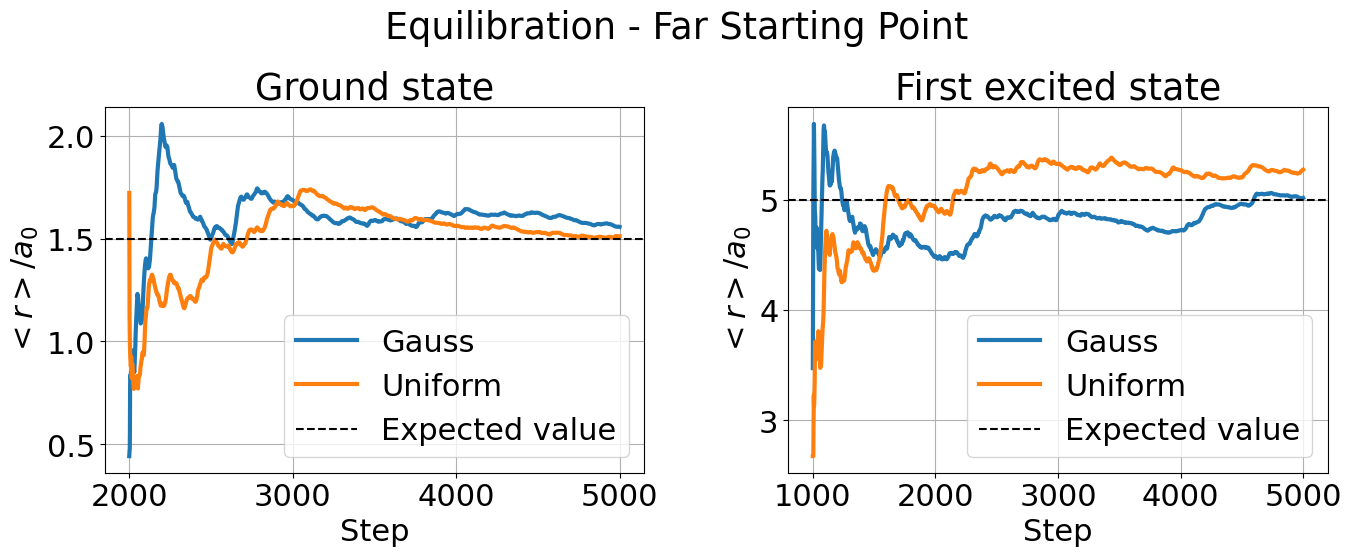

In [42]:
running_avg_gauss = np.cumsum(data_far_100[2000:].gauss) / np.arange(1, len(data_far_100[2000:].gauss)+1)
running_avg_unif = np.cumsum(data_far_100[2000:].unif) / np.arange(1, len(data_far_100[2000:].unif)+1)

fig, ax = plt.subplots(1,2, figsize=(14,6))

fig.suptitle("Equilibration - Far Starting Point")
ax[0].plot(running_avg_gauss, label='Gauss', lw=3)
ax[0].plot(running_avg_unif, label='Uniform', lw=3)
ax[0].axhline(y=1.5, color='black', linestyle='--', label='Expected value', lw=1.5) 
ax[0].set_xlabel("Step")
ax[0].set_ylabel(r"$<r>/a_0$")
ax[0].legend()
ax[0].set_title("Ground state")
ax[0].grid()

running_avg_gauss = np.cumsum(data_far_210[1000:].gauss) / np.arange(1, len(data_far_210[1000:].gauss)+1)
running_avg_unif = np.cumsum(data_far_210[1000:].unif) / np.arange(1, len(data_far_210[1000:].unif)+1)

ax[1].plot(running_avg_gauss, label='Gauss', lw=3)
ax[1].plot(running_avg_unif, label='Uniform', lw=3)
ax[1].axhline(y=5, color='black', linestyle='--', label='Expected value', lw=1.5)
ax[1].set_xlabel("Step")
ax[1].set_ylabel(r"$<r>/a_0$")
ax[1].legend()
ax[1].set_title("First excited state")
ax[1].grid()

plt.tight_layout(rect=[0, 0.03, 1, 1.05])
plt.show()

#### Sampling 



Once equilibrium is reached, I collect a large number $M = 10^6$ of samples and use them to estimate the mean radial distance $\langle r \rangle$. However, due to the nature of the Metropolis algorithm, successive samples are not statistically independent. This poses a problem when estimating statistical uncertainties, as naive calculations of standard deviation would underestimate the true error.
To mitigate this, I divide the data into $N = 50$ blocks, each containing $M/N$ samples, and compute the block averages and statistical uncertainty.

For this analysis, I start from reasonably starting points, as described before, and perform 2000 steps of equilibration, as determined from the equilibration analysis above. This ensures that the sampling begins from a reasonably equilibrated region of configuration space.

Plots of the cumulative mean and associated uncertainty show good convergence and agreement with theoretical expectations. This validates both the implementation of the Metropolis algorithm and the statistical treatment of the data. The figures below illustrate the results of the data blocking procedure for both state and both transition probabilities.

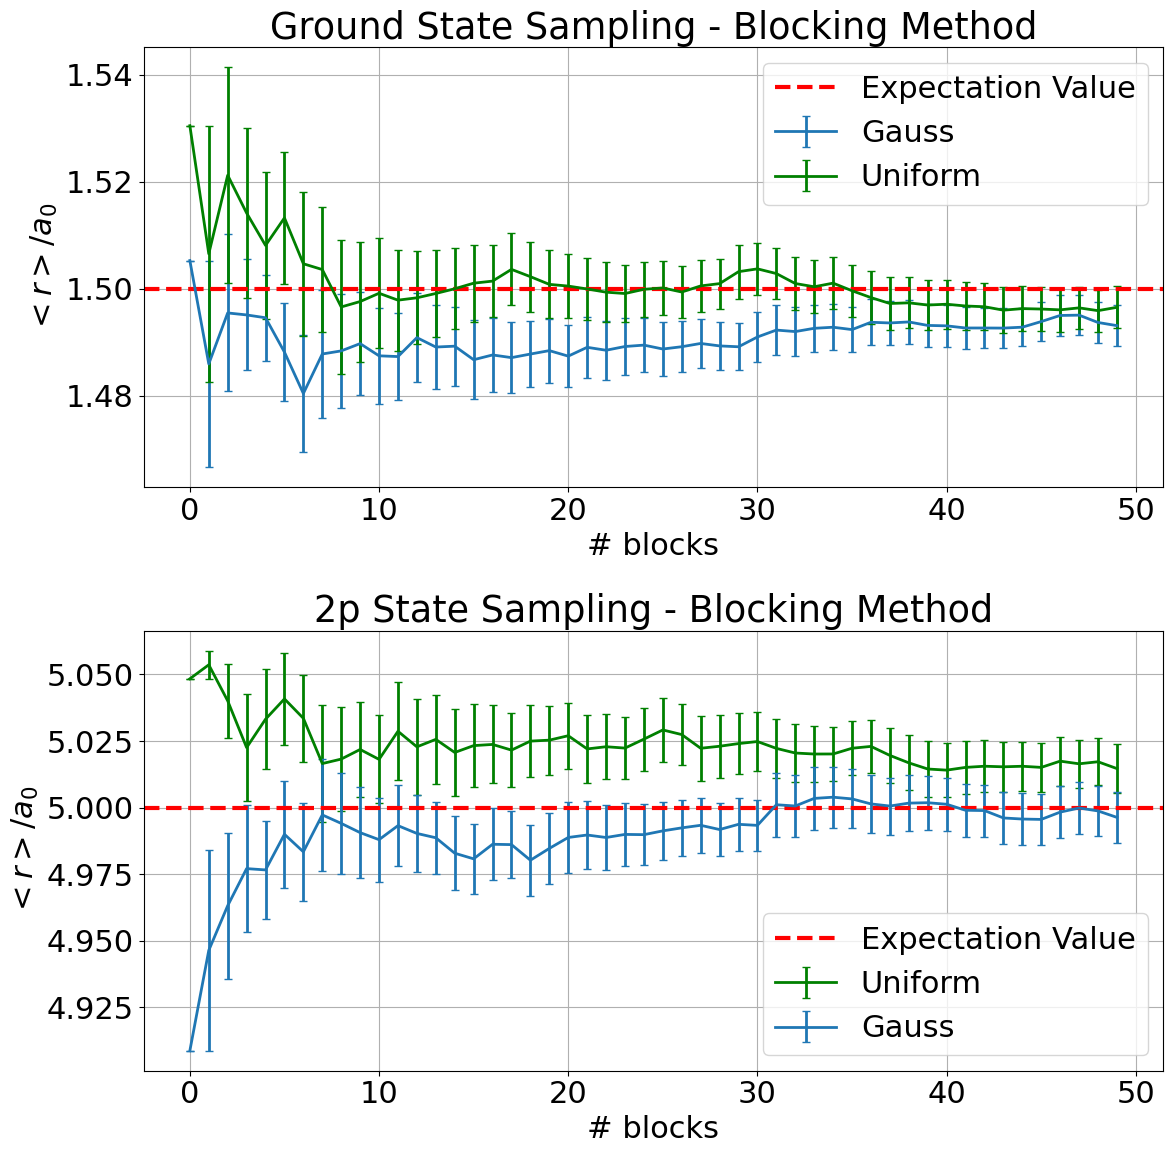

In [47]:
unif_100 = np.loadtxt("es_05.1/SIM/OUTPUT/output_100_unif.dat")
gauss_100 = np.loadtxt("es_05.1/SIM/OUTPUT/output_100_gauss.dat")

unif_210 = np.loadtxt("es_05.1/SIM/OUTPUT/output_210_unif.dat")
gauss_210 = np.loadtxt("es_05.1/SIM/OUTPUT/output_210_gauss.dat")

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].set_title('Ground State Sampling - Blocking Method')
axs[0].errorbar(gauss_100[:, 0]*0.5e-4, gauss_100[:, 1], yerr=gauss_100[:, 2],  capsize=3, lw=2, label='Gauss')
axs[0].errorbar(unif_100[:, 0]*0.5e-4, unif_100[:, 1], yerr=unif_100[:, 2],  capsize=3, lw=2, label='Uniform', color='green')
axs[0].axhline(y=1.5, color='r', linestyle='--', label='Expectation Value', lw=3) 
axs[0].set_xlabel('# blocks')
axs[0].set_ylabel(r"$<r>/a_0$")
axs[0].legend()
axs[0].grid()

axs[1].set_title('2p State Sampling - Blocking Method')
axs[1].errorbar(unif_210[:, 0]*0.5e-4, unif_210[:, 1], yerr=unif_210[:, 2],  capsize=3, lw=2, label='Uniform', color='green')
axs[1].errorbar(gauss_210[:, 0]*0.5e-4, gauss_210[:, 1], yerr=gauss_210[:, 2],  capsize=3, lw=2, label='Gauss')
axs[1].axhline(y=5, color='r', linestyle='--', label='Expectation Value', lw =3)
axs[1].set_xlabel('# blocks')
axs[1].set_ylabel(r"$<r>/a_0$")
axs[1].legend()
axs[1].grid()

plt.tight_layout()

##### Autocorrelation and Block Size



Since the Metropolis algorithm generates correlated samples, it is important to assess how far apart two measurements must be in order to be considered effectively independent. To do this, I analyze the autocorrelation function of the radial distance $r$, using the raw post-equilibration, that is the same samples used in the data blocking analysis, but without any binning or averaging.

The autocorrelation function is defined for a random variable $m(t)$ as:

$$ \rho(\tau) = \frac{Cov(m(t),m(t+\tau ))}{Var(m(t))} $$

In practice, I use the following discrete approximation:

$$
\chi(t) = \frac{
\frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \, m(t' + \tau)
-
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \right)
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t' + \tau) \right)
}{
\frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t')^2
-
\left( \frac{1}{t - \tau} \sum_{t'=0}^{t - \tau} m(t') \right)^2
}
$$


where $\tau$ is the lag and in this situation $m(t)$ is the the radial distance $r$.


This function measures the persistence of memory in the Markov chain: if $\rho(t)$ is large, it means that samples $t$ steps apart are still significantly correlated. A rapid decay of $\rho(t)$ to zero indicates effective statistical independence.

From my results, the autocorrelation function, for all four sampling situantions, $\rho(t)$ drops near $0$ in **50 steps**, indicating that this is a reasonable estimate for the autocorrelation time of the system. In comparison, the block size used in the blocking method is on the order of **20000 samples** (since I use $M = 10^6$ total samples and divide them into $N = 50$ blocks), which is **orders of magnitude larger** than the autocorrelation length. This ensures that each block average is composed of many effectively independent samples, validating the assumptions underlying the blocking method.

Below, I show the autocorrelation function $\rho(t)$ computed for four representative cases, graound state and first excited state with uniform and gaussian transition probabilities.





In [44]:
def autocorr(m, t):
    N = len(m)
    avg1 = np.mean(m[:N - t] * m[t:])
    avg2 = np.mean(m[:N - t]) * np.mean(m[t:])

    numerator = avg1 - avg2

    # Parte inferiore (varianza)
    variance = np.mean(m[:N - t]**2) - (np.mean(m[:N - t]))**2
    var = np.var(m[:N - t])

    return numerator / var  


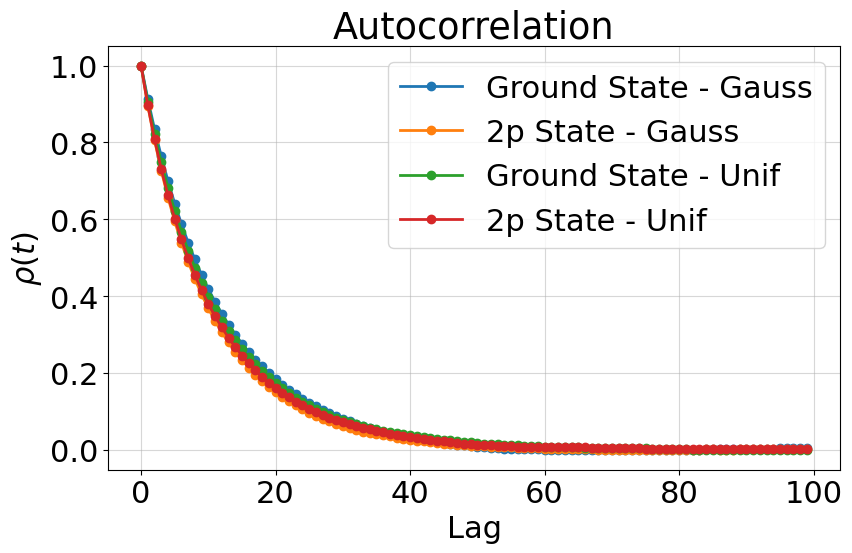

In [45]:
max_lag = 100

x, y, z = np.loadtxt('es_05.1/SIM/OUTPUT/xyz_100_gauss.dat', usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
A_gauss_100 =  [autocorr(r, lag) for lag in range(max_lag)]

plt.figure(figsize=(9, 6))
plt.plot(A_gauss_100, marker='o', linestyle='-', linewidth=2, label='Ground State - Gauss')

x, y, z = np.loadtxt('es_05.1/SIM/OUTPUT/xyz_210_gauss.dat', usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
A_gauss_210 =  [autocorr(r, lag) for lag in range(max_lag)]
plt.plot(A_gauss_210, marker='o', linestyle='-', linewidth=2, label='2p State - Gauss')

x, y, z = np.loadtxt('es_05.1/SIM/OUTPUT/xyz_100_unif.dat', usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
A_unif_100 =  [autocorr(r, lag) for lag in range(max_lag)]
plt.plot(A_unif_100, marker='o', linestyle='-', linewidth=2, label='Ground State - Unif')

x, y, z = np.loadtxt('es_05.1/SIM/OUTPUT/xyz_210_unif.dat', usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
A_unif_210 =  [autocorr(r, lag) for lag in range(max_lag)]
plt.plot(A_unif_210, marker='o', linestyle='-', linewidth=2, label='2p State - Unif')


plt.xlabel("Lag")
plt.ylabel(r"$\rho(t)$")
plt.grid(True,  alpha=0.5)
plt.legend()
plt.title("Autocorrelation")
plt.tight_layout()
plt.show()


#### Orbital Visualization


As a final step, I visualize the sampled positions in 3D space to gain qualitative insight into the structure of the orbitals. This step is purely illustrative, but it offers a powerful confirmation of the quantum mechanical predictions.

- The $\Psi_{1,0,0}$ distribution is spherically symmetric, as expected for the ground state of the hydrogen atom.
- The $\Psi_{2,1,0}$ distribution exhibits the characteristic dumbbell shape aligned along the $z$-axis, with a nodal plane at $z=0$, consistent with the $p_z$ orbital.

These plots confirm that the Metropolis algorithm is successfully reproducing the spatial probability distributions encoded in the hydrogen wavefunctions.



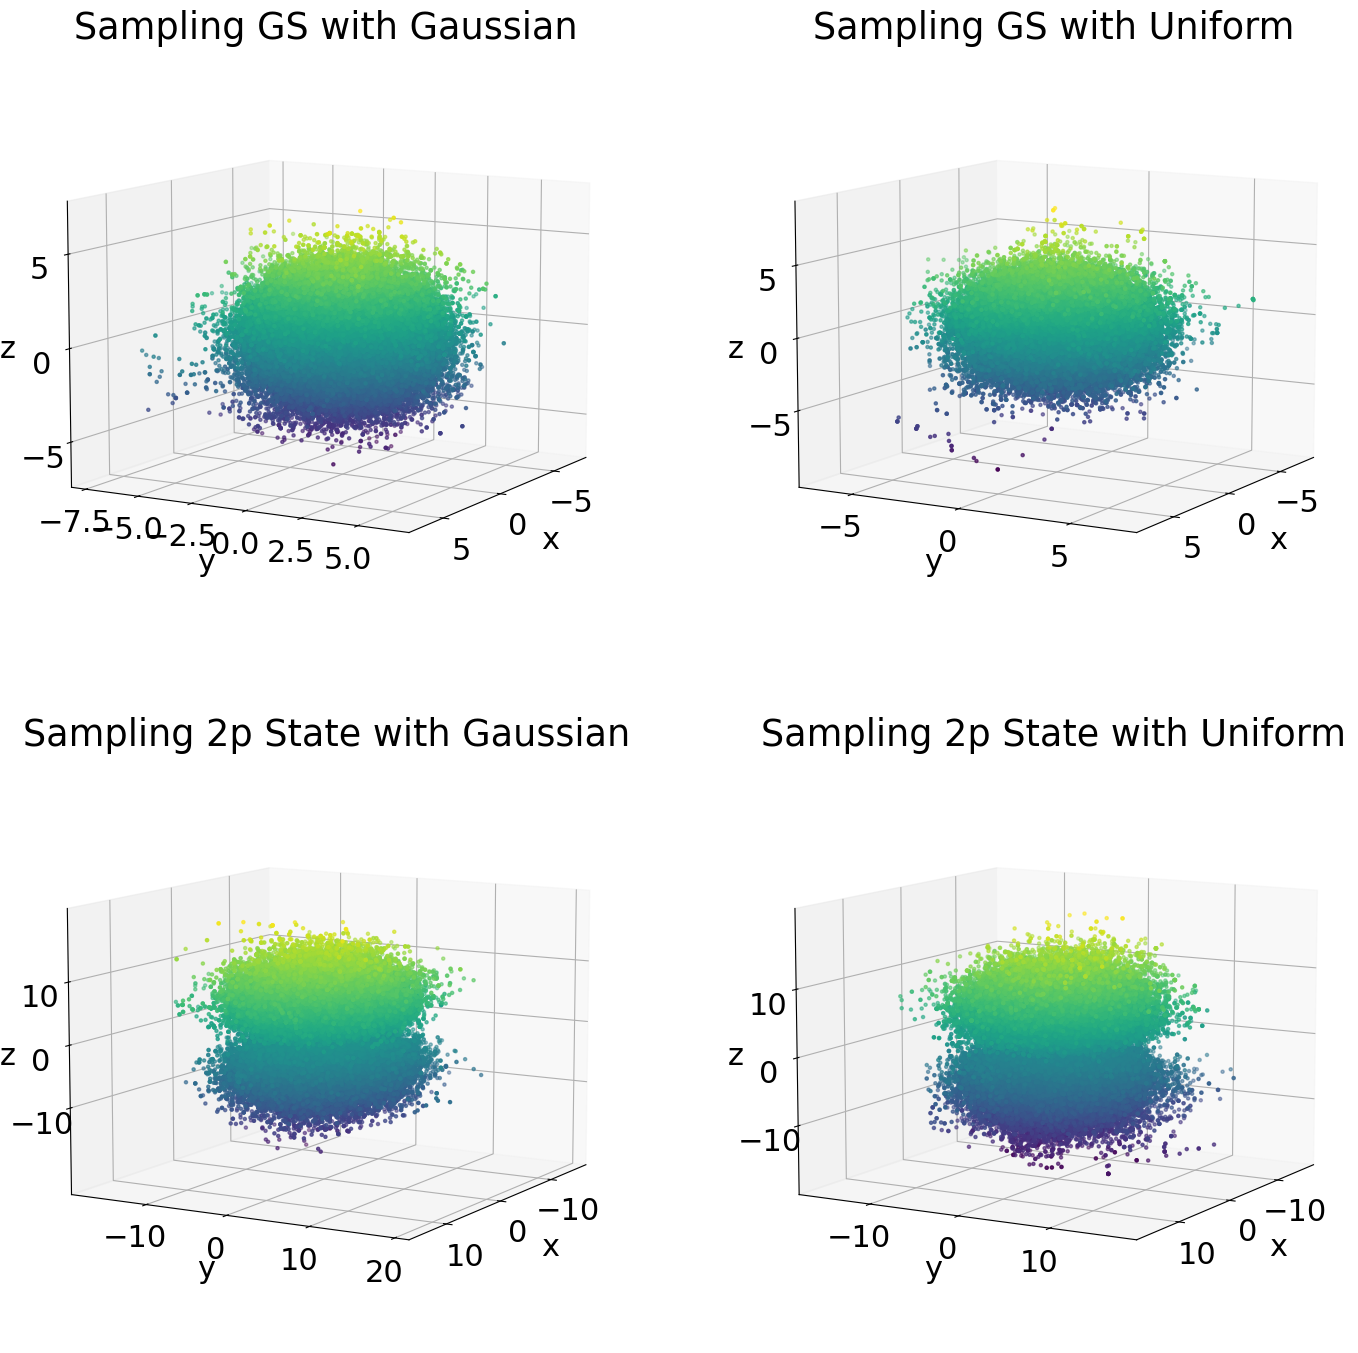

In [46]:
xyz_100 = pd.read_csv('es_05.1/SIM/OUTPUT/xyz_100_gauss.dat', names=['x', 'y', 'z'], delimiter=' ')
xyz_210 = pd.read_csv('es_05.1/SIM/OUTPUT/xyz_210_gauss.dat', names=['x', 'y', 'z'], delimiter=' ')

xyz_100_unif = pd.read_csv('es_05.1/SIM/OUTPUT/xyz_100_unif.dat', names=['x', 'y', 'z'], delimiter=' ')
xyz_210_unif = pd.read_csv('es_05.1/SIM/OUTPUT/xyz_210_unif.dat', names=['x', 'y', 'z'], delimiter=' ')

fig = plt.figure(figsize=(14, 14))  

# Gaussian
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(xyz_100['x'], xyz_100['y'], xyz_100['z'], c=xyz_100['z'], marker='.')
ax1.set_title("Sampling GS with Gaussian")
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel('z')
ax1.set_xticks([-5, 0, 5])
ax1.set_zticks([-5, 0, 5])
ax1.view_init(elev=10, azim=30)

# Uniform
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(xyz_100_unif['x'], xyz_100_unif['y'], xyz_100_unif['z'], c=xyz_100_unif['z'], marker='.')
ax2.set_title("Sampling GS with Uniform")
ax2.set_xlabel('x', labelpad=10)
ax2.set_ylabel('y', labelpad=10)
ax2.set_zlabel('z')
ax2.set_xticks([-5, 0, 5])
ax2.set_zticks([-5, 0, 5])
ax2.set_yticks([-5, 0, 5])
ax2.view_init(elev=10, azim=30)

# Gaussian
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(xyz_210['x'], xyz_210['y'], xyz_210['z'], c=xyz_210['z'], marker='.')
ax3.set_title("Sampling 2p State with Gaussian")
ax3.set_xlabel('x', labelpad=10)
ax3.set_ylabel('y', labelpad=10)
ax3.set_zlabel('z')
ax3.set_xticks([-10, 0, 10])
ax3.set_zticks([-10, 0, 10])
ax3.view_init(elev=10, azim=30)

# Uniform
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(xyz_210_unif['x'], xyz_210_unif['y'], xyz_210_unif['z'], c=xyz_210_unif['z'], marker='.')
ax4.set_title("Sampling 2p State with Uniform")
ax4.set_xlabel('x', labelpad=10)
ax4.set_ylabel('y', labelpad=10)
ax4.set_zlabel('z')
ax4.set_xticks([-10, 0, 10])
ax4.set_zticks([-10, 0, 10])
ax4.view_init(elev=10, azim=30)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()